In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# กำหนดชื่อไฟล์ Excel
file_path = '1.xlsx'


### uvb

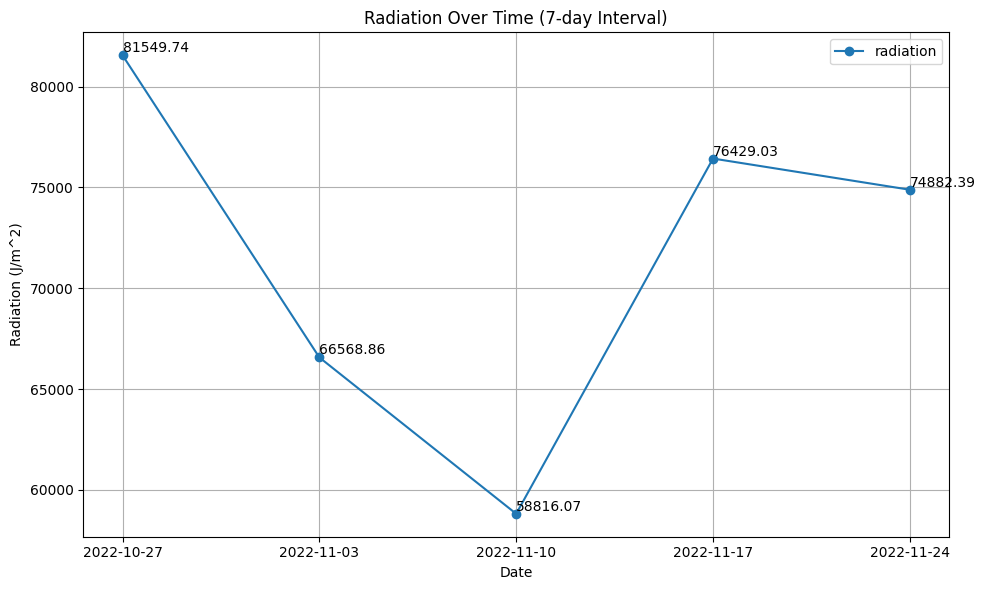

In [2]:
# โหลดข้อมูลจากไฟล์ Excel
df = pd.read_excel(file_path)
# แปลงข้อมูลในคอลัมน์ 'date' เป็นชนิดข้อมูล datetime
df['date'] = pd.to_datetime(df['date'])
# กำหนด 'date' เป็น index
df.set_index('date', inplace=True)
# Convert 'uvb' column to numeric, coerce errors to NaN
df['uvb'] = pd.to_numeric(df['uvb'], errors='coerce')

# สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
df_resampled = df.resample('7D').agg({'uvb': 'mean'})

# เลื่อน index ไป 7 วัน
df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

# ตัดข้อมูลเฉพาะที่ต้องการแสดง
end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
df_resampled = df_resampled[df_resampled.index <= end_date]

# พล็อตกราฟ
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['uvb'], label='radiation', marker='o')
plt.xticks(df_resampled.index)

# แสดงตัวเลขบนแต่ละ marker
for i, value in enumerate(df_resampled['uvb']):
    plt.text(df_resampled.index[i], value, f'{value:.2f}', ha='left', va='bottom')

# ปรับแต่งกราฟ
plt.title('Radiation Over Time (7-day Interval)')
plt.xlabel('Date')
plt.ylabel('Radiation (J/m^2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Radiation.png', bbox_inches='tight')
plt.show()


### duration_of_Day

C:\Users\User\AppData\Local\Temp\ipykernel_2660\1842019405.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])
C:\Users\User\AppData\Local\Temp\ipykernel_2660\1842019405.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])


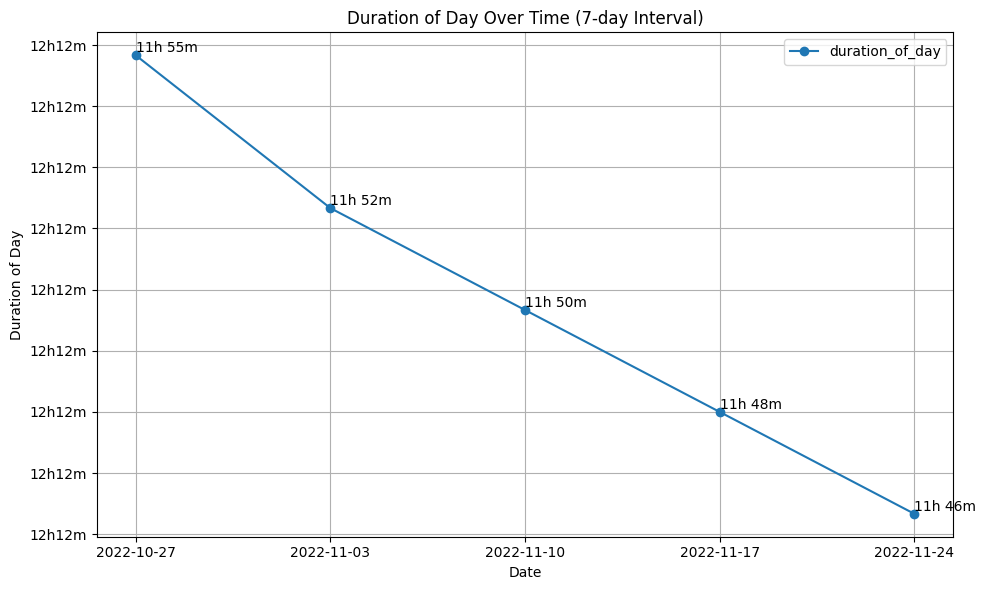

In [3]:

# โหลดข้อมูลจากไฟล์ Excel
df = pd.read_excel(file_path)
# แปลงข้อมูลในคอลัมน์ 'date' เป็นชนิดข้อมูล datetime
df['date'] = pd.to_datetime(df['date'])

# กำหนด 'date' เป็น index
df.set_index('date', inplace=True)

# คำนวณระยะเวลาของแต่ละวัน
df['duration_of_day'] = pd.to_datetime(df['sunset']) - pd.to_datetime(df['sunrise'])

# สร้าง DataFrame ใหม่โดยรวมข้อมูลทุก 7 วัน
df_resampled = df.resample('7D').agg({'duration_of_day': 'mean'})

# เลื่อน index ไป 7 วัน
df_resampled.index = df_resampled.index + pd.DateOffset(days=6)

# แปลงระยะเวลาจากวินาทีเป็น ชั่วโมงและนาที
df_resampled['duration_hours'] = df_resampled['duration_of_day'].dt.seconds // 3600
df_resampled['duration_minutes'] = (df_resampled['duration_of_day'].dt.seconds % 3600) // 60

# ตัดข้อมูลเฉพาะที่ต้องการแสดง
end_date = df.index[-1]  # วันที่สิ้นสุดของข้อมูล
df_resampled = df_resampled[df_resampled.index <= end_date]

# พล็อตกราฟ
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled['duration_hours'] + df_resampled['duration_minutes'] / 60, label='duration_of_day', marker='o')
plt.xticks(df_resampled.index)

# แสดงตัวเลขบนแต่ละ marker
for i, (hours, minutes) in enumerate(zip(df_resampled['duration_hours'], df_resampled['duration_minutes'])):
    time_str = f'{int(hours)}h {int(minutes)}m'
    plt.text(df_resampled.index[i], hours + minutes / 60, time_str, ha='left', va='bottom')

# ปรับแต่งกราฟ
plt.title('Duration of Day Over Time (7-day Interval)')
plt.xlabel('Date')
plt.ylabel('Duration of Day')

# กำหนดแกน y ให้แสดงเป็นรูปแบบ "11h48m"
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x:.0f}h{x:.0f}m"))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Duration_of_Day.png', bbox_inches='tight')
plt.show()
